In [1]:
from qiskit import IBMQ
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute

#Earlier IBMQ.save_account('TOKEN') needs to be run
IBMQ.load_accounts()

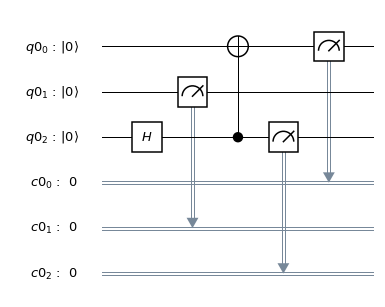

In [3]:
qr = QuantumRegister(3)
cr = ClassicalRegister(3)

circuit = QuantumCircuit(qr, cr)

circuit.h(qr[2])
circuit.cx(qr[2], qr[0])
circuit.measure(qr, cr)

%matplotlib inline
circuit.draw(output='mpl')

In [5]:
backend = IBMQ.get_backend('ibmqx4')

In [6]:
job = execute(circuit, backend=backend, shots=1024, max_credits=3,
              memory=True)

In [18]:
job.status()

<JobStatus.QUEUED: 'job is queued'>

In [19]:
job.queue_position()

51

In [20]:
job.job_id()

'5cce018b557a5600718c544a'

In [22]:
from qiskit.tools.monitor import job_monitor, backend_monitor, backend_overview
job_monitor(job, interval=5)

HTML(value="<p style='font-size:16px;'>Job Status: job is queued </p>")

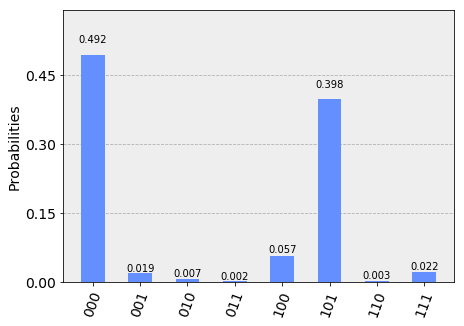

In [35]:
result = job.result()
counts=result.get_counts(circuit)

plot_histogram(counts)

In [ ]:
data = job.result().get_memory()
for bitstring in data:
    print(bitstring)